In [1]:
import sys
dirname = '/Users/m.daffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

from scipy import linalg
from smt.utils.misc import compute_rms_error

from smt.problems import Sphere, NdimRobotArm, Rosenbrock
from smt.sampling_methods import LHS
from smt.surrogate_models import LS, QP, KPLS, KRG, KPLSK, GEKPLS, MGP

#to ignore warning messages
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import scipy.interpolate

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
plot_status = True

import numpy as np

In [2]:
ndim = 2
ndoe = 20 #int(10*ndim)
fun = Rosenbrock(ndim=ndim)
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
xt = sampling(ndoe)

In [3]:
from smt.explainability_tools._partial_dependence import partial_dependence

In [4]:
features = [0]
model = None
pd_results = partial_dependence(model, xt, features)

In [5]:
pd_results

[{'grid_values': [array([-1.86878202, -1.83196149, -1.79514095, -1.75832042, -1.72149988,
          -1.68467934, -1.64785881, -1.61103827, -1.57421773, -1.5373972 ,
          -1.50057666, -1.46375612, -1.42693559, -1.39011505, -1.35329451,
          -1.31647398, -1.27965344, -1.2428329 , -1.20601237, -1.16919183,
          -1.13237129, -1.09555076, -1.05873022, -1.02190968, -0.98508915,
          -0.94826861, -0.91144807, -0.87462754, -0.837807  , -0.80098647,
          -0.76416593, -0.72734539, -0.69052486, -0.65370432, -0.61688378,
          -0.58006325, -0.54324271, -0.50642217, -0.46960164, -0.4327811 ,
          -0.39596056, -0.35914003, -0.32231949, -0.28549895, -0.24867842,
          -0.21185788, -0.17503734, -0.13821681, -0.10139627, -0.06457573,
          -0.0277552 ,  0.00906534,  0.04588588,  0.08270641,  0.11952695,
           0.15634749,  0.19316802,  0.22998856,  0.26680909,  0.30362963,
           0.34045017,  0.3772707 ,  0.41409124,  0.45091178,  0.48773231,
          

In [6]:
features = [0, 1, [0, 1]]
model = None
pd_results = partial_dependence(model, xt, features)

In [7]:
pd_results[0]

{'grid_values': [array([-1.86878202, -1.83196149, -1.79514095, -1.75832042, -1.72149988,
         -1.68467934, -1.64785881, -1.61103827, -1.57421773, -1.5373972 ,
         -1.50057666, -1.46375612, -1.42693559, -1.39011505, -1.35329451,
         -1.31647398, -1.27965344, -1.2428329 , -1.20601237, -1.16919183,
         -1.13237129, -1.09555076, -1.05873022, -1.02190968, -0.98508915,
         -0.94826861, -0.91144807, -0.87462754, -0.837807  , -0.80098647,
         -0.76416593, -0.72734539, -0.69052486, -0.65370432, -0.61688378,
         -0.58006325, -0.54324271, -0.50642217, -0.46960164, -0.4327811 ,
         -0.39596056, -0.35914003, -0.32231949, -0.28549895, -0.24867842,
         -0.21185788, -0.17503734, -0.13821681, -0.10139627, -0.06457573,
         -0.0277552 ,  0.00906534,  0.04588588,  0.08270641,  0.11952695,
          0.15634749,  0.19316802,  0.22998856,  0.26680909,  0.30362963,
          0.34045017,  0.3772707 ,  0.41409124,  0.45091178,  0.48773231,
          0.52455285,  

In [8]:
pd_results[1]

{'grid_values': [array([-1.80821044, -1.77100673, -1.73380303, -1.69659932, -1.65939562,
         -1.62219191, -1.58498821, -1.54778451, -1.5105808 , -1.4733771 ,
         -1.43617339, -1.39896969, -1.36176598, -1.32456228, -1.28735857,
         -1.25015487, -1.21295116, -1.17574746, -1.13854375, -1.10134005,
         -1.06413634, -1.02693264, -0.98972893, -0.95252523, -0.91532152,
         -0.87811782, -0.84091411, -0.80371041, -0.76650671, -0.729303  ,
         -0.6920993 , -0.65489559, -0.61769189, -0.58048818, -0.54328448,
         -0.50608077, -0.46887707, -0.43167336, -0.39446966, -0.35726595,
         -0.32006225, -0.28285854, -0.24565484, -0.20845113, -0.17124743,
         -0.13404372, -0.09684002, -0.05963631, -0.02243261,  0.0147711 ,
          0.0519748 ,  0.0891785 ,  0.12638221,  0.16358591,  0.20078962,
          0.23799332,  0.27519703,  0.31240073,  0.34960444,  0.38680814,
          0.42401185,  0.46121555,  0.49841926,  0.53562296,  0.57282667,
          0.61003037,  

In [9]:
pd_results[2]['grid_values'][0]

array([-1.86878202, -1.83196149, -1.79514095, -1.75832042, -1.72149988,
       -1.68467934, -1.64785881, -1.61103827, -1.57421773, -1.5373972 ,
       -1.50057666, -1.46375612, -1.42693559, -1.39011505, -1.35329451,
       -1.31647398, -1.27965344, -1.2428329 , -1.20601237, -1.16919183,
       -1.13237129, -1.09555076, -1.05873022, -1.02190968, -0.98508915,
       -0.94826861, -0.91144807, -0.87462754, -0.837807  , -0.80098647,
       -0.76416593, -0.72734539, -0.69052486, -0.65370432, -0.61688378,
       -0.58006325, -0.54324271, -0.50642217, -0.46960164, -0.4327811 ,
       -0.39596056, -0.35914003, -0.32231949, -0.28549895, -0.24867842,
       -0.21185788, -0.17503734, -0.13821681, -0.10139627, -0.06457573,
       -0.0277552 ,  0.00906534,  0.04588588,  0.08270641,  0.11952695,
        0.15634749,  0.19316802,  0.22998856,  0.26680909,  0.30362963,
        0.34045017,  0.3772707 ,  0.41409124,  0.45091178,  0.48773231,
        0.52455285,  0.56137339,  0.59819392,  0.63501446,  0.67

In [10]:
test = [0, 1]
if test[1]:
    print('sdsd')

sdsd


In [11]:
import pandas as pd

In [12]:
x_df = pd.DataFrame({'x1': [0, 10, 8], 'x2': [1, 2, 3], 'x3': ['a', 'a', 'b']})
X = np.array(x_df)
model = None
features = [0, 1, 2, (0, 2)]
categorical_features = [0, 0, 1]
pd_results = partial_dependence(model, X, features, categorical_features=categorical_features)

In [13]:
pd_results[3]

{'grid_values': [array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
          0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
          1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
          1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
          2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
          2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
          3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
          3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
          4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
          4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
          5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
          5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
          6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
          6.56565657,  

In [14]:
X[:, 0]

array([0, 10, 8], dtype=object)

# Predictions

In [89]:
from sklearn.utils.extmath import cartesian
def cartesian(arrays, out=None):
    """Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray of shape (M, len(arrays)), default=None
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray of shape (M, len(arrays))
        Array containing the cartesian products formed of input arrays.
        If not provided, the `dtype` of the output array is set to the most
        permissive `dtype` of the input arrays, according to NumPy type
        promotion.

        .. versionadded:: 1.2
           Add support for arrays of different types.

    Notes
    -----
    This function may not be used on more than 32 arrays
    because the underlying numpy functions do not support it.

    Examples
    --------
    >>> from sklearn.utils.extmath import cartesian
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """
    arrays = [np.asarray(x) for x in arrays]
    shape = (len(x) for x in arrays)

    ix = np.indices(shape)
    ix = ix.reshape(len(arrays), -1).T

    if out is None:
        dtype = np.result_type(*arrays)  # find the most permissive dtype
        if dtype.str[:2] != '<U':
            out = np.empty_like(ix, dtype=dtype)
        else:
            out = np.empty_like(ix, dtype='object')

    for n, arr in enumerate(arrays):
        out[:, n] = arrays[n][ix[:, n]]

    return out

In [108]:
def _partial_dependence_brute(
    model, grid_values, features, X, sample_weight=None
):
    grid = cartesian(grid_values)
    
    predictions = []
    averaged_predictions = []

    for new_values in grid:
        X_eval = X.copy()
        for i, feature in enumerate(features):
            X_eval[:, i] = new_values[i]
        pred = model.predict_values(X_eval) 
    
    pass

In [16]:
########### Initialization of the problem, construction of the training and validation points

ndim = 2
ndoe = 20 #int(10*ndim)
# Define the function
fun = Rosenbrock(ndim=ndim)

# Construction of the DOE
# in order to have the always same LHS points, random_state=1
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
xt = sampling(ndoe)
# Compute the outputs
yt = fun(xt)

# Construction of the validation points
ntest = 200 #500
sampling = LHS(xlimits=fun.xlimits, criterion='ese', random_state=1)
xtest = sampling(ntest)
ytest = fun(xtest)

In [17]:
yt[:, 0].shape

(20,)

In [18]:
X = xt.copy()
y = yt[:, 0]

t = KRG(theta0=[1e-2]*ndim,print_prediction = False)
t.set_training_values(X, y)

t.train()

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 20
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.1767352


In [101]:
features = [0, 1, [0, 1]]
model = None
pd_results = partial_dependence(model, X, features, grid_resolution=20)

In [98]:
pd_results

[{'grid_values': [array([-1.86878202, -1.83196149, -1.79514095, -1.75832042, -1.72149988,
          -1.68467934, -1.64785881, -1.61103827, -1.57421773, -1.5373972 ,
          -1.50057666, -1.46375612, -1.42693559, -1.39011505, -1.35329451,
          -1.31647398, -1.27965344, -1.2428329 , -1.20601237, -1.16919183,
          -1.13237129, -1.09555076, -1.05873022, -1.02190968, -0.98508915,
          -0.94826861, -0.91144807, -0.87462754, -0.837807  , -0.80098647,
          -0.76416593, -0.72734539, -0.69052486, -0.65370432, -0.61688378,
          -0.58006325, -0.54324271, -0.50642217, -0.46960164, -0.4327811 ,
          -0.39596056, -0.35914003, -0.32231949, -0.28549895, -0.24867842,
          -0.21185788, -0.17503734, -0.13821681, -0.10139627, -0.06457573,
          -0.0277552 ,  0.00906534,  0.04588588,  0.08270641,  0.11952695,
           0.15634749,  0.19316802,  0.22998856,  0.26680909,  0.30362963,
           0.34045017,  0.3772707 ,  0.41409124,  0.45091178,  0.48773231,
          

In [110]:
pred = t.predict_values(X)

In [111]:
pred.shape

(20, 1)

In [25]:
cartesian

<function __main__.cartesian(arrays, out=None)>

In [106]:
grid = cartesian(pd_results[2]['grid_values'])

In [116]:
arrays = ([0, 1], [1, 2, 3], ['a', 'b'])
arrays = [[0, 1], [1, 2, 3], [0.5, 0.8], ['a', 'b']]
arrays = [['a', 'b'], ['c', 'sdsddsdd']]

lengths = (len(array) for array in arrays)
grid = cartesian(arrays)

In [123]:
def addition_2d(a, b):
    return a + b
def addition_3d(a, b, c):
    return a + b + c


In [217]:
arrays = [[0, 1], [2, 3, 4]]
arrays = [[0, 1, 2, 3]]
lengths = [len(array) for array in arrays]
grid = cartesian(arrays)

nsamp = 3
X = np.ones((nsamp, 3))
X[:, 2] = np.array([0, 1, 2])
sample_weight = [1, 1, 1]

predictions = []
averaged_predictions = []
for new_values in grid:
    X_eval = X.copy()
    for i in range(grid.shape[1]):
        X_eval[:, i] = new_values[i]
    # print(X_eval)
    pred = X_eval.sum(axis=1)
    averaged_pred = np.average(pred, weights=None)

    predictions.append(pred)
    averaged_predictions.append(averaged_pred)
predictions = np.array(predictions).T
averaged_predictions = np.array(averaged_predictions).T

predictions = predictions.reshape([nsamp]+lengths)
averaged_predictions = averaged_predictions.reshape(lengths)

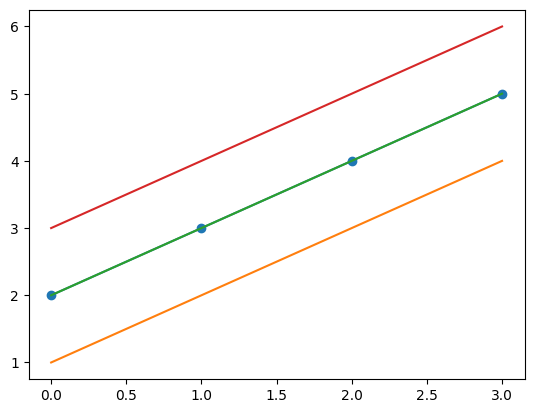

In [218]:
plt.scatter(arrays[0], averaged_predictions)
plt.plot(arrays[0], averaged_predictions)
for i in range(len(X)):
    plt.plot(arrays[0], predictions[i])

In [210]:
X

array([[1., 1., 0.],
       [1., 1., 1.],
       [1., 1., 2.]])

In [211]:
predictions[0]

array([1., 2., 3., 4.])

In [204]:
predictions[1]

array([2., 3.])

In [205]:
predictions[2]

array([3., 4.])

In [207]:
averaged_predictions

array([2., 3.])

In [195]:
pred

array([2., 3., 4.])

In [191]:
predictions

array([[1., 2.],
       [2., 3.],
       [3., 4.]])

In [193]:
averaged_predictions

array([2., 3.])

In [194]:
X_eval

array([[1., 1., 0.],
       [1., 1., 1.],
       [1., 1., 2.]])

In [189]:
grid.shape

(2, 1)

In [187]:
predictions

array([[[2., 3., 4.],
        [3., 4., 5.]],

       [[3., 4., 5.],
        [4., 5., 6.]],

       [[4., 5., 6.],
        [5., 6., 7.]]])

In [184]:
predictions.reshape(nsamp, -1, -1)

ValueError: can only specify one unknown dimension

In [181]:
predictions.reshape([nsamp]+lengths)

array([[[2., 3., 4.],
        [3., 4., 5.]],

       [[3., 4., 5.],
        [4., 5., 6.]],

       [[4., 5., 6.],
        [5., 6., 7.]]])

In [180]:
lengths

[2, 3]

In [154]:
predictions.reshape(nsamp, 2, 3)

array([[[2., 3., 4.],
        [3., 4., 5.]],

       [[3., 4., 5.],
        [4., 5., 6.]],

       [[4., 5., 6.],
        [5., 6., 7.]]])

In [169]:
XX, YY = np.meshgrid([0, 1], [2, 3, 4])
Z = averaged_predictions.reshape(2, 3).T

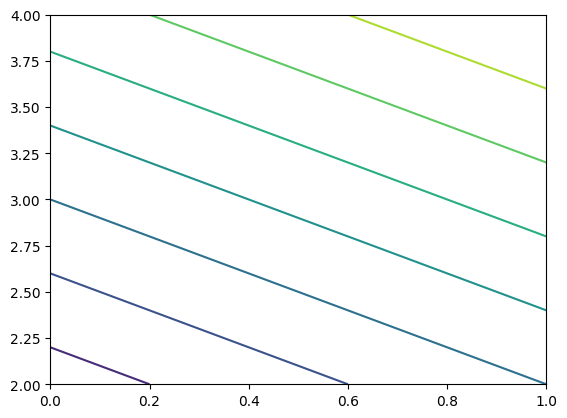

In [170]:
plt.contour(XX, YY, Z)


In [173]:
XX

array([[0, 1],
       [0, 1],
       [0, 1]])

In [174]:
YY

array([[2, 2],
       [3, 3],
       [4, 4]])

In [171]:
Z

array([[3., 4.],
       [4., 5.],
       [5., 6.]])

In [159]:
XX

array([[0, 1],
       [0, 1],
       [0, 1]])

In [155]:
averaged_predictions.reshape(2, 3)

array([[3., 4., 5.],
       [4., 5., 6.]])

In [146]:
grid

array([[0, 2],
       [0, 3],
       [0, 4],
       [1, 2],
       [1, 3],
       [1, 4]])

In [148]:
np.meshgrid(arrays)

[array([list([0, 1]), list([2, 3, 4])], dtype=object)]

In [145]:
grid.reshape(2, 3)

ValueError: cannot reshape array of size 12 into shape (2,3)

In [144]:
averaged_predictions.reshape(2, 3)

array([[3., 4., 5.],
       [4., 5., 6.]])